* Come up with a question about the Citibike data usage. It can be anything that involves Categorical data.
* Choose the significance threshold
* Clearly state they Null and Alternate hypothesis
* Wrangle the data so that it is ready for your analysis.

In [1]:
from __future__  import print_function, division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")


# Question: 

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            #if is 2014 move the csv file using proper defined file name
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            
            #if is not 2014, move the csv file using the current name structure
            else:
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

                
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201606'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53


In [20]:
df.shape

(1460318, 16)

## Question: Does the annual suscriber's trips on citi bikes last longer than the 24-hour pass or 7-day pass user's trips?

### Null Hypothesis  ($H_0$):

The annual suscriber's trips average time on citi bikes is *the same* that the average trip time of the  24-hour pass or 7-day pass users, for the month of June 2016.

$$H_0 : \mu_{tripTimeAnn} = \mu_{tripTimeSubs} $$

### Alternative Hypothesis ($H_a$):


$$H_A : \mu_{tripTimeAnn} \neq \mu_{tripTimeSubs} $$

The annual suscriber's trips average time on citi bikes is *not the same* that the average trip time of the  24-hour pass or 7-day pass users, for the month of June 2016.

### Confidence level: 95%
Significance threshold  $\alpha=0.05$

In [6]:
alpha = 0.05

In [7]:
# data cleaning
#User Type (Customer = 24-hour pass or 7-day pass user; Subscriber = Annual Member)

df = df.loc[:,['usertype','tripduration','date']]
df.head()

,usertype,tripduration,date
0,Subscriber,1470,2016-06-01 00:00:18
1,Subscriber,229,2016-06-01 00:00:20
2,Subscriber,344,2016-06-01 00:00:21
3,Subscriber,1120,2016-06-01 00:00:28
4,Subscriber,229,2016-06-01 00:00:53


In [29]:
df['tripduration'].groupby(df['usertype']).mean()

usertype
Customer      2152.122233
Subscriber     849.905440
Name: tripduration, dtype: float64

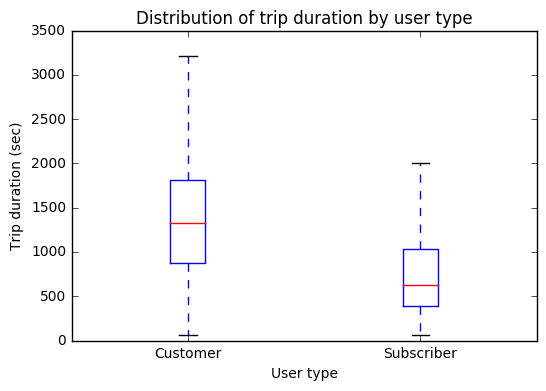

In [26]:
#plt.boxplot(df['tripduration'], 0, '')
customerData = df['tripduration'][df['usertype']=='Customer']
suscriberData = df['tripduration'][df['usertype']=='Subscriber']
dataPlot = [customerData,suscriberData]


# Create a figure instance
fig = plt.figure(figsize=(6, 4))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(dataPlot, 0, '')
ax.set_xticklabels(['Customer', 'Subscriber'])
ax.set_ylabel('Trip duration (sec)')
ax.set_xlabel('User type')
ax.set_title("Distribution of trip duration by user type")

## Figure 2:
The median of the customer's trip duration is higher than the subscriber's 